<a href="https://colab.research.google.com/github/Jakom001/Learning-Data-Science/blob/main/Performance_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performance Evaluation, Cross Validation and Hyper-parameter Tuning

1. Evaluation metrics
2. Cross Validation
3. Hyperparameter Tuning

Load Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Load data

In [8]:
col = ["num_preg", "plasma_glucose_conc", "D_blood_pressure", "skin_fold_thickness", "serum_insulin", "body_mass_index", "pedigree_func", "age", "diabetes"]
diabetes_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/ML_Models/master/Performance_Evaluation/diabetes.txt", names = col)

In [9]:
diabetes_data.describe()

,num_preg,plasma_glucose_conc,D_blood_pressure,skin_fold_thickness,serum_insulin,body_mass_index,pedigree_func,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetes_data.head()

,num_preg,plasma_glucose_conc,D_blood_pressure,skin_fold_thickness,serum_insulin,body_mass_index,pedigree_func,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Separating input and output Variables

In [11]:
X= diabetes_data.drop('diabetes', axis = 1)
y = diabetes_data.diabetes

Spliting the data into training and testing.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=3)


**Developing a model** <br>
Here we have used MLPClassifier from neural_network module of sklearn library. MLP Classifier is also a classification algorithm like logistic regression or decision tree. We will soon learn about Neural Networks and Artificial Neural Networks in the upcoming sessions. So, no need to worry about it.



In [13]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter= 1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

**Performance Evaluation**

1. Evaluation Metrics

<br> Confusion Matrix 

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[82, 10],
       [45, 17]])

In [15]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# ravel is used to convert a 2D array to a 1d array.

In [16]:
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 17
True Negative 82
False Positive 10
False Negative 45


Text(87.0, 0.5, 'True Value')

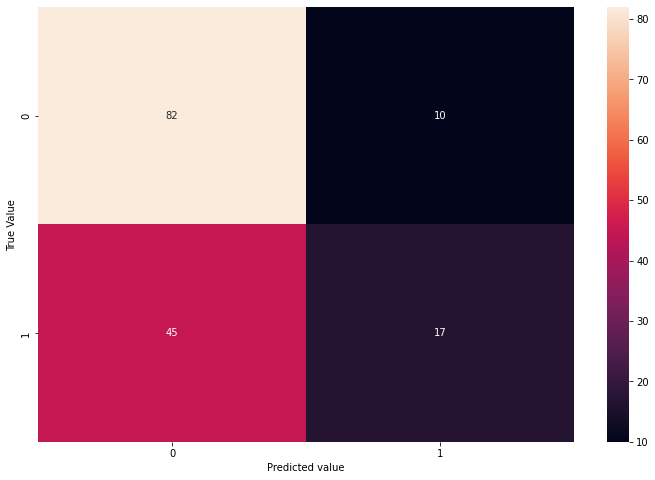

In [17]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot =True)
plt.xlabel("Predicted value")
plt.ylabel("True Value")

Accuracy

In [18]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.6428571428571429

When is it good to use accuracy score as a model evaluation metric?

The classifications in the dataset is nearly symmetrical (means equal distribution of all the classes).
The false positive and false negative on test data are nearly equal.

Recall/ Sensitivity

In [19]:
from sklearn.metrics import recall_score

In [20]:
recall_score(y_test, y_pred)

0.27419354838709675

**Specificity**
<br>
adding parameter pos_label =0 to the recall function, we treat that as the positive class, and hence gives the correct output

In [21]:
print("Specificity with recall pos label = 0: ", recall_score(y_test, y_pred, pos_label =0))

Specificity with recall pos label = 0:  0.8913043478260869


Checking with formulas (tn , fp from confusion matrix):

In [22]:
print("Specificity with Formulas: ", tn/(tn+fp))

Specificity with Formulas:  0.8913043478260869


Precission

In [23]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.6296296296296297

Checking with the formulae

In [24]:
tp / (tp + fp)

0.6296296296296297

Imbalanced Dataset

In [25]:
diabetes_data.diabetes.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

Matthews Correlation Coefficient

In [26]:
from sklearn.metrics import matthews_corrcoef

print("MCC Score:", matthews_corrcoef(y_test, y_pred))

MCC Score: 0.21345114722108818


F1 Score
It is the harmonic mean of Precision and recall

In [27]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.3820224719101123


**Area Under the Curve (Reciever Operating Characterstics)**

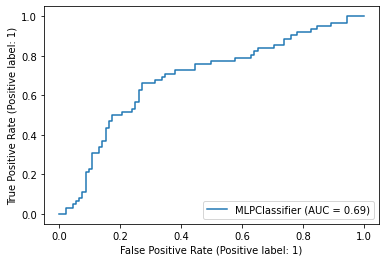

In [28]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(mlp, X_test, y_test)

Regression matrics

In [29]:
wine = pd.read_csv("https://raw.githubusercontent.com/dphi-official/ML_Models/master/Performance_Evaluation/winequality.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Separate input and output variables

In [30]:
X = wine.drop('quality', axis= 1)
y = wine.quality

Split into training and testing (80:20)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_pred[:10]

array([5.44455619, 5.57868309, 5.99091469, 5.19864346, 6.0666099 ,
       5.01639077, 5.68416174, 6.26611011, 5.97010538, 5.65519351])

Performance Measurement
1. Mean Absolute Error (MAE)
2. Mean Squrred Error (MSE)
3. Root Mean Squared Error (RMSE)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  0.597235855877647
MSE:  0.5906658099548086
MAE:  0.7685478579469261


4. R Squared
<br> The metric helps us to compare our current model with a constant baseline and tells us how much our model is better

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2832037191111012

**Cross Validation**
<br>
Usually, our data is divided into Train and Test Sets. The Train set is further divided into Train and Validation set.

The Validation Set helps us in selecting good parameters/tune the parameters for our model.

In [35]:
X =  diabetes_data.drop('diabetes', axis =1)
y = diabetes_data.diabetes

K-Fold Cross validation

In [36]:
from sklearn.model_selection import cross_validate

We can also import cross_val_score from the same library, but it only allows a single scorer to be implemented. So we are using cross_validate

In [37]:
cv_results = cross_validate(mlp, X, y, cv=10, scoring = ["accuracy", "precision", "recall"])
cv_results

{'fit_time': array([0.64785242, 0.6425643 , 0.85242319, 0.46745443, 0.47395873,
        0.62138653, 0.3837204 , 0.69166589, 0.58224082, 0.73282909]),
 'score_time': array([0.00654006, 0.00538182, 0.00535583, 0.0054965 , 0.00530505,
        0.00526404, 0.00586057, 0.00535631, 0.00539851, 0.00539875]),
 'test_accuracy': array([0.67532468, 0.72727273, 0.66233766, 0.71428571, 0.74025974,
        0.72727273, 0.75324675, 0.68831169, 0.72368421, 0.71052632]),
 'test_precision': array([0.53333333, 0.66666667, 0.54545455, 0.59259259, 0.73333333,
        1.        , 0.83333333, 0.55555556, 0.59259259, 0.66666667]),
 'test_recall': array([0.59259259, 0.44444444, 0.22222222, 0.59259259, 0.40740741,
        0.22222222, 0.37037037, 0.55555556, 0.61538462, 0.30769231])}

cv=10 is provided, which means we are performing 10 fold cross validation

In [38]:
print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())

Accuracy:  0.7122522214627478
Precision:  0.6719528619528619
Recall:  0.433048433048433


For all Valid scoring options

In [39]:
import sklearn.metrics as m
m.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

Leave one out cross validation

*This code takes a long time to run, you can either skip running this part and directly just see the printed results, or wait for 10-15 mins for this to run*

In [40]:
from sklearn.model_selection import LeaveOneOut

In [41]:
cv_results = cross_validate(mlp, X, y,
cv= LeaveOneOut(), scoring=['accuracy'])
cv_results

{'fit_time': array([0.92377472, 0.26913261, 0.55466533, 0.46903777, 0.80789089,
        0.68469286, 0.63487959, 0.77598596, 1.2332027 , 0.58431721,
        0.6988256 , 0.49234986, 0.3691895 , 0.35853744, 0.43439436,
        1.03939795, 0.47053742, 0.89037037, 0.46552134, 0.91846108,
        0.80449557, 0.43247914, 0.47329211, 0.6549387 , 0.65237308,
        0.4820137 , 0.56345463, 0.67209959, 0.43492579, 0.63997197,
        0.52840519, 0.86258793, 0.24842858, 0.57163429, 0.82631922,
        0.48201466, 0.58468342, 0.64381337, 0.55921268, 0.48976612,
        0.36906815, 0.45707393, 0.74247599, 0.63909626, 1.06585217,
        0.72547102, 0.44718957, 0.55651355, 0.41164088, 0.44064021,
        0.71101665, 0.63188982, 0.38710427, 0.48934555, 0.41187   ,
        0.56705976, 0.85405874, 0.33804941, 0.65710902, 0.62137079,
        0.77028871, 0.60543823, 0.64072251, 0.57342291, 0.48396802,
        1.17834377, 0.53597331, 0.53156495, 0.50117564, 0.42338991,
        0.93468618, 0.67919397, 0.40

In [42]:
cv_results['test_accuracy'].mean()

0.6953125

Hyperarameter Tuning
<br> Methods
1. Grid Search Cv

Crime Rate- Linear Regression

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
crime = pd.read_csv("https://raw.githubusercontent.com/dphi-official/ML_Models/master/Performance_Evaluation/Standard%20Metropolitan%20Areas%20Data%20-%20train_data.csv")

In [47]:
train, test = train_test_split(crime)
x_train = train.drop('crime_rate', axis = 1)
y_train = train.crime_rate
x_test = test.drop('crime_rate', axis = 1)
y_test = test.crime_rate

Performance without grid search:


In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred, squared=False)

Performance with Grid Search
<br> Step 1. Define parameter space

In [ ]:
parameters = {'fit_intercept': [True, False], 'normalize':[True, False], 'copy_X':[True, False], 'n_jobs':[-1, 1, 10, 15]}

Step 2: Fit the model to find the best hyperparameters on training data, and select the scorer you want to select to optimise

In [ ]:
grid = GridSearchCV(lr, parameters, cv =3)
grid.fit(x_train, y_train)

Step 3: Print the best obtained parameters

In [ ]:
grid.best_estimator_

In [ ]:
grid_lr = LinearRegression(copy_X = True, fit_intercept=True, n_jobs =1, normalize= False)

grid_lr.fit(x_train, y_train)
y_pred = grid_lr.predict(x_test)
mean_squared_error(y_test, y_pred, squared = False)

2. Artifical Neural Network

In [ ]:
# Use diabetes data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

step 1. define parameter space

In [ ]:
parameter_space = {
'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'],
'alpha': [0.0001, 0.05],
'learning_rate': ['constant','adaptive'],
}

Step 2: Fit the model to find the best hyperparameters on training data, and select the scorer you want to select to optimise

*This code takes a long time to run, you can either skip running this part and directly just see the printed results, or wait for 10-15 mins for this to run*

In [ ]:
mlp_random = GridSearchCV(mlp, parameter_space, scoring = 'accuracy')
mlp_random.fit(x_train, y_train)

Step 3: Print the best obtained parameters

In [ ]:
mlp_random.best_params_

Step 4: Train your model on these parameters

In [ ]:
mlp_grid = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(100,), alpha=0.0001,
activation='tanh',max_iter=2000)

In [ ]:
mlp_grid.fit(x_train, y_train)
y_pred = mlp_grid.predict(x_test)
acc_tuned = accuracy_score(y_test, y_pred)

Comparing with Accuracy from model without hyperparameter tuning

In [ ]:
print("Accuracy of Tuned model: ",np.round(acc_tuned,3))
print("Accuracy of non-Tuned model: ",np.round(acc,3))